In [26]:
import os
from docx import Document
import re
import spacy
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from transformers import pipeline
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


In [28]:
docs = []
path = "docs"
for dir in os.listdir(path):
    document = Document(os.path.join(path, dir))
    data = ''
    for para in document.paragraphs:
        data += " " + para.text
    docs.append(data)

In [29]:
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
stop = stopwords.words('english')
def textCleaner(doc):
        doc = re.sub("[,.']", "", doc)
        doc = [token for token in doc.split(' ') if len(re.sub("[a-zA-Z]", "", token)) <= 0]
        doc = nlp(" ".join(doc))
        taglist = ['RB','RBR', 'RBS','JJR','JJ','JJS','NN','NNS','VB','VBG','VBP','VBN']
        poslist = ['ADJ','ADV','NOUN','VERB']
        doc = [token.lemma_.lower() for token in doc if token.tag_ in taglist and token.pos_ in poslist]
        doc = [token for token in doc if not token in stop and len(token)>2]
        return doc

In [30]:
def tone_anly_sent_1(doc):
  dic=dict()
  sen=doc.split('.')
  sentiment=pipeline('sentiment-analysis')
  for sent in sen:
    sentence=textCleaner(sent)
    sentence=" ".join(sentence)
    result = sentiment(sentence)[0]
    dic[result['label']]=dic.get(result['label'],0)+result['score']
  print(dic)
  plt.bar(dic.keys(),dic.values())

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


{'NEGATIVE': 43.33003878593445, 'POSITIVE': 46.66011172533035}


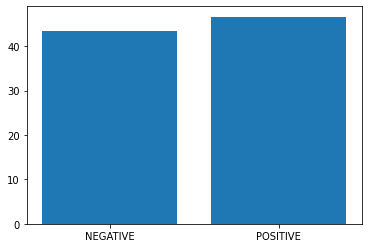

In [31]:
tone_anly_sent_1(docs[6])

In [32]:
def text_anly_doc2(doc):
  text=" ".join(textCleaner(docs[0]))
  sid_obj = SentimentIntensityAnalyzer() 
  sentiment_dict = sid_obj.polarity_scores(text)     
  print(sentiment_dict)
  
  res=max(zip(list(sentiment_dict.values())[:3],list(sentiment_dict.keys())[:3]))[1]
  if(res=='neu'):
    print('Neutral')
  elif(res=='pos'):
    print('Positive')
  else:
    print('Negative')

  plt.bar(sentiment_dict.keys(),sentiment_dict.values())

In [33]:
def tone_anly_para2(doc):
  dic=dict()
  paragraph=doc.split('\n')
  sid_obj = SentimentIntensityAnalyzer()
  for para in paragraph:
    para=textCleaner(para)
    para=" ".join(para)
    sentiment_dict = sid_obj.polarity_scores(para)
    # print(para)
    dic['neg']=dic.get('neg',0)+sentiment_dict['neg']
    dic['pos']=dic.get('pos',0)+sentiment_dict['pos']
    dic['neu']=dic.get('neu',0)+sentiment_dict['neu']

  res=max(zip(list(dic.values())[:3],list(dic.keys())[:3]))[1]    
  if(res=='neu'):
    print('Neutral')
  elif(res=='pos'):
    print('Positive')
  else:
    print('Negative')
  print(dic)
  plt.bar(dic.keys(),dic.values())

Neutral
{'neg': 0.75, 'pos': 2.174, 'neu': 5.0760000000000005}


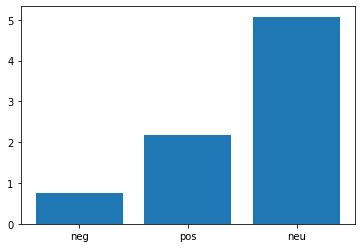

In [34]:
tone_anly_para2(docs[0])

In [35]:
def tone_anly_sent2(doc):
  dic=dict()
  sen=doc.split('.')
  sid_obj = SentimentIntensityAnalyzer()
  
  for sent in sen:
    sentence=textCleaner(sent)
    sentence=" ".join(sentence)
    # print(sentence)
    sentiment_dict = sid_obj.polarity_scores(sentence)
    dic['neg']=dic.get('neg',0)+sentiment_dict['neg']
    dic['pos']=dic.get('pos',0)+sentiment_dict['pos']
    dic['neu']=dic.get('neu',0)+sentiment_dict['neu']

  res=max(zip(list(dic.values())[:3],list(dic.keys())[:3]))[1]    
  if(res=='neu'):
    print('Neutral')
  elif(res=='pos'):
    print('Positive')
  else:
    print('Negative')

  plt.bar(dic.keys(),dic.values())

Neutral


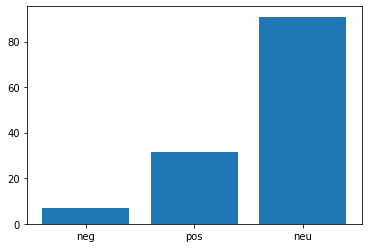

In [36]:
tone_anly_sent2(docs[0])

In [37]:
import flair
from flair.models import TextClassifier
flair_sentiment = TextClassifier.load('en-sentiment')

2021-12-05 11:00:51,759 loading file C:\Users\lenovo\.flair\models\sentiment-en-mix-distillbert_4.pt


In [38]:
def tone_anly_doc3(doc):
  text=" ".join(textCleaner(docs[0]))
  sentence=flair.data.Sentence(text)
  flair_sentiment.predict(sentence)
  total_sentiment = sentence.labels
  res_dic=total_sentiment[0].to_dict()
  print(res_dic)
  for keys in res_dic:
    if keys=='value':
      res_dic[keys] = str(res_dic[keys])
    else:
      res_dic[keys] = int(res_dic[keys])

In [39]:
tone_anly_doc3(docs[0])

{'value': 'POSITIVE', 'confidence': 0.9145067930221558}


In [40]:
def tone_anly_sent3(doc):
  dic=dict() 
  sent=doc.split('.')
  for sen in sent:
    sentence=textCleaner(sen)
    sentence=" ".join(sentence)
    if(sentence==""):
      pass
    else:
      sentence=flair.data.Sentence(sentence)
      flair_sentiment.predict(sentence)
      total_sentiment = sentence.labels
      val=total_sentiment[0].to_dict()
      dic[val['value']]=dic.get(val['value'],0)+float(val['confidence'])
  print(dic)

In [41]:
tone_anly_sent3(docs[0])

{'POSITIVE': 79.00198620557785, 'NEGATIVE': 31.64176243543625}


In [42]:
def tone_anly_para3(doc):
  dic=dict() 
  sent=doc.split('\n')
  for sen in sent:
    sentence=textCleaner(sen)
    sentence=" ".join(sentence)
    if(sentence==""):
      pass
    else:
      sentence=flair.data.Sentence(sentence)
      flair_sentiment.predict(sentence)
      total_sentiment = sentence.labels
      val=total_sentiment[0].to_dict()
      dic[val['value']]=dic.get(val['value'],0)+float(val['confidence'])
  print(dic)

In [43]:
tone_anly_para3(docs[0])

{'POSITIVE': 7.0281084179878235}
